In [1]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

# import plotly.plotly as py
# import plotly.offline as pyoff
# import plotly.graph_objs as go
# pyoff.init_notebook_mode(connected=True)

In [2]:
url = 'https://raw.githubusercontent.com/abaranovskis-redsamurai/automation-repo/master/forecast-lstm/shampoo.csv'
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

df = pd.read_csv(url, parse_dates=[0], index_col=0, date_parser=parser)
df.tail()

,Sales
Month,
1903-08-01,407.6
1903-09-01,682.0
1903-10-01,475.3
1903-11-01,581.3
1903-12-01,646.9


In [3]:
df.shape

(36, 1)

In [4]:
train = df
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

In [5]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [6]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
history = model.fit_generator(generator,epochs=100,verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 4 steps
Epoch 1/100
4/4 [==============================] - 1s 294ms/step - loss: 0.2364
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1855
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1175
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0446
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0562
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0420
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0269
Epoch 8/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0338
Epoch 9/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0317
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0253
Epoch 11/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0210
Epoch 12/

4/4 [==============================] - 0s 11ms/step - loss: 0.0117
Epoch 100/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0116


Text(0.5, 1.0, 'Categorical Plotting')

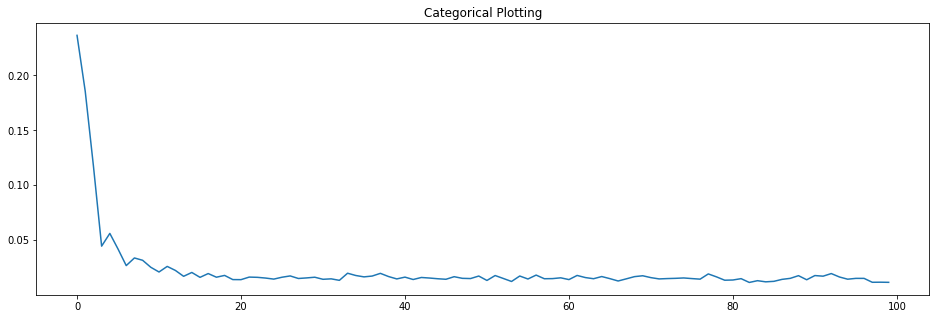

In [7]:
import matplotlib.pyplot as plt

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure(figsize=(16,5))
plt.plot(hist['epoch'],hist['loss'])

plt.title('Categorical Plotting')

In [8]:
 train[-n_input:]

array([[0.39168296],
       [0.57064155],
       [0.34938688],
       [0.56868669],
       [0.50115514],
       [0.56531011],
       [0.81073396],
       [0.51235116],
       [1.        ],
       [0.63266394],
       [0.82104141],
       [0.93762218]])

In [9]:
 train[-n_input:].shape

(12, 1)

In [10]:
pred_list = []
batch = train[-n_input:].reshape((1, n_input, n_features))

In [11]:
batch.shape

(1, 12, 1)

In [12]:
batch[0]

array([[0.39168296],
       [0.57064155],
       [0.34938688],
       [0.56868669],
       [0.50115514],
       [0.56531011],
       [0.81073396],
       [0.51235116],
       [1.        ],
       [0.63266394],
       [0.82104141],
       [0.93762218]])

In [13]:
for i in range(n_input):
    print('----------------------------------------------------')
    pred_list.append(model.predict(batch)[0]) 
    print(pred_list)
#     print(pred_list.shape)
    print('----------------------------------------------------')
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    print(batch)
    print(batch.shape)
    print('----------------------------------------------------')

----------------------------------------------------
[array([0.9431287], dtype=float32)]
----------------------------------------------------
[[[0.57064155]
  [0.34938688]
  [0.56868669]
  [0.50115514]
  [0.56531011]
  [0.81073396]
  [0.51235116]
  [1.        ]
  [0.63266394]
  [0.82104141]
  [0.93762218]
  [0.94312871]]]
(1, 12, 1)
----------------------------------------------------
----------------------------------------------------
[array([0.9431287], dtype=float32), array([1.0139757], dtype=float32)]
----------------------------------------------------
[[[0.34938688]
  [0.56868669]
  [0.50115514]
  [0.56531011]
  [0.81073396]
  [0.51235116]
  [1.        ]
  [0.63266394]
  [0.82104141]
  [0.93762218]
  [0.94312871]
  [1.01397574]]]
(1, 12, 1)
----------------------------------------------------
----------------------------------------------------
[array([0.9431287], dtype=float32), array([1.0139757], dtype=float32), array([1.0758477], dtype=float32)]
------------------------------

In [14]:
batch.shape

(1, 12, 1)

In [15]:
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]

In [16]:
add_dates

[Timestamp('1903-12-01 00:00:00'),
 Timestamp('1904-01-01 00:00:00'),
 Timestamp('1904-02-01 00:00:00'),
 Timestamp('1904-03-01 00:00:00'),
 Timestamp('1904-04-01 00:00:00'),
 Timestamp('1904-05-01 00:00:00'),
 Timestamp('1904-06-01 00:00:00'),
 Timestamp('1904-07-01 00:00:00'),
 Timestamp('1904-08-01 00:00:00'),
 Timestamp('1904-09-01 00:00:00'),
 Timestamp('1904-10-01 00:00:00'),
 Timestamp('1904-11-01 00:00:00'),
 Timestamp('1904-12-01 00:00:00')]

In [26]:
r=0
for ii in add_dates:
    r=r+1
print(r)

13


In [18]:
column = df.columns
column

Index(['Sales'], dtype='object')

In [19]:
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [20]:
future_dates

,Sales
1904-01-01,NaN
1904-02-01,NaN
1904-03-01,NaN
1904-04-01,NaN
1904-05-01,NaN
1904-06-01,NaN
1904-07-01,NaN
1904-08-01,NaN
1904-09-01,NaN
1904-10-01,NaN


In [21]:
pred_list

[array([0.9431287], dtype=float32),
 array([1.0139757], dtype=float32),
 array([1.0758477], dtype=float32),
 array([1.1755086], dtype=float32),
 array([1.2634553], dtype=float32),
 array([1.3717487], dtype=float32),
 array([1.4897963], dtype=float32),
 array([1.5883604], dtype=float32),
 array([1.7611635], dtype=float32),
 array([1.895177], dtype=float32),
 array([2.1193566], dtype=float32),
 array([2.3594458], dtype=float32)]

In [22]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-n_input:].index, columns=['Prediction'])

In [23]:
df_predict

,Prediction
1904-01-01,649.998522
1904-02-01,689.864149
1904-03-01,724.679526
1904-04-01,780.758700
1904-05-01,830.246281
1904-06-01,891.182986
1904-07-01,957.608367
1904-08-01,1013.070413
1904-09-01,1110.306686
1904-10-01,1185.716102


In [24]:
df_proj = pd.concat([df,df_predict], axis=1)
df_proj

,Sales,Prediction
1901-01-01,266.0,NaN
1901-02-01,145.9,NaN
1901-03-01,183.1,NaN
1901-04-01,119.3,NaN
1901-05-01,180.3,NaN
1901-06-01,168.5,NaN
1901-07-01,231.8,NaN
1901-08-01,224.5,NaN
1901-09-01,192.8,NaN
1901-10-01,122.9,NaN


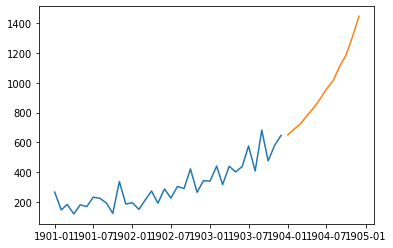

In [25]:
plt.plot(df_proj)